In [1]:
# import libraries needed
import pandas as pd
from collections import OrderedDict

import glob
from natsort import natsorted
import json
import tldextract
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import random
random.seed(42)

In [2]:
# lib_subs = ['Socialism_101', 'progressive', 'socialism', 'obama', 'occupywallstreet', 'neoliberal', 'democrats']
# con_subs = ['askaconservative', 'NolibsWatch', 'Romney', 'neoconNWO', 'Republican', 'Conservative']
# res_subs = ['far_right', 'DylannRoofInnocent', 'alllivesmatter', 'pol', 'Physical_Removal', 'nazi', 'WhiteRights', 'ZOG', 
#             'NationalSocialism', 'paleoconservative', '911truth', 'tea_party', 'HBD', 'CringeAnarchy', 'uncensorednews',
#             'ChapoTrapHouse', 'new_right', 'The_Donald']
# after removing None json files
lib_subs = ['progressive', 'socialism', 'obama', 'occupywallstreet', 'neoliberal', 'democrats']
con_subs = ['askaconservative', 'NolibsWatch', 'Romney', 'neoconNWO', 'Republican', 'Conservative']
res_subs = ['DylannRoofInnocent', 'alllivesmatter', 'pol', 'Physical_Removal', 'nazi', 'WhiteRights', 'ZOG', 
            'NationalSocialism', 'paleoconservative', '911truth', 'tea_party', 'HBD', 'CringeAnarchy', 'uncensorednews',
            'new_right', 'The_Donald']

In [3]:
subs_dir = "/home/ravi/PROJECTS_DATA/RedditNewsDataCombined_filterURLdomains_TextAll_FilterNaN_FilterDup_FilterURLsInText_WC_Filter250WC/"

def mergeSubreddits(subs):
    dfs = []    
    for sub in subs:
        df = pd.read_json(subs_dir+'subreddit_'+sub+'.json')
        # To replace NoneType with empty string
        df['author_flair_text'] = [str(ii or '') for ii in df['author_flair_text'].tolist()]
        # print(df)
        df = df.sort_index(axis=1)
        # print(df)
        # break
        df['SubReddit']=sub
        dfs.append(df)

    mergeDF = pd.concat(dfs, ignore_index=True)
    
    
    return mergeDF.sample(frac=1, random_state=42, ignore_index=True)

In [4]:
libDF = mergeSubreddits(lib_subs)
libDF['label']=0
conDF = mergeSubreddits(con_subs)
conDF['label']=1
resDF = mergeSubreddits(res_subs)
resDF['label']=2

In [5]:
libDF

,WordCount,_id,article,author,author_flair_text,created_utc,domain,id,num_comments,score,url,url_domain,SubReddit,label
0,893,613f5688013f9c836df825db,Front page layout Site theme Sign up or login ...,BigLove99,,1491358039,arstechnica.com,63iqc8,3,208,https://arstechnica.com/tech-policy/2017/04/tr...,arstechnica,democrats,0
1,536,613f644a013f9c836d634fcd,What the Alt-Right Understands About Winning E...,therecordcorrected,Paul Krugman,1498021680,tabletmag.com,6ijplc,7,18,http://www.tabletmag.com/scroll/238157/what-th...,tabletmag,neoliberal,0
2,661,62185f6d24cdf35c10238680,© 1998-2022 Nexstar Media Inc. All Rights Rese...,BlankVerse,nan,1617385735,thehill.com,mipiar,6,133,https://thehill.com/homenews/house/546127-boeh...,thehill,obama,0
3,1027,6216a9db24cdf35c1047d33a,"Welcome, Christopher Paul Hasson, a Lieutenant...",Ghdust2,,1550789993,rollingstone.com,at9rdp,3,16,https://www.rollingstone.com/politics/politics...,rollingstone,democrats,0
4,1157,613e30c2b39e90adb1822ec1,Text surrounded by asterisks (*) is italicized...,[deleted],,1322270819,hubski.com,mpfci,0,2,http://hubski.com/pub?id=9494,hubski,occupywallstreet,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72483,457,621822c424cdf35c102cee65,Chinese newspaper said countries that boycott ...,lotsofsweat,,1613397646,theguardian.com,lke7uy,7,91,https://www.theguardian.com/world/2021/feb/15/...,theguardian,neoliberal,0
72484,1436,613e2d41b39e90adb1101c63,"Editorial Director, HuffPost WASHINGTON -- In ...",[deleted],nan,1308805870,huffingtonpost.com,i6we6,1,1,http://www.huffingtonpost.com/2011/06/22/obama...,huffingtonpost,obama,0
72485,857,613f37a5013f9c836da1359d,"Donald Trump's ""outreach"" to black voters is a...",circularoad,,1474806261,salon.com,54evk6,0,36,http://www.salon.com/2016/09/25/trumps-racist-...,salon,democrats,0
72486,487,613f2243013f9c836d344b83,You are now logged in. Forgot your password? C...,jimrosenz,,1460085821,reason.com,4duobb,2,0,http://reason.com/blog/2016/04/05/paul-krugman...,reason,progressive,0


In [6]:
conDF

,WordCount,_id,article,author,author_flair_text,created_utc,domain,id,num_comments,score,url,url_domain,SubReddit,label
0,1101,613f0449013f9c836de253fa,Retired US Army General Wesley Clark called fo...,gtfooh1011,,1437509071,wsws.org,3e4190,3,18,http://www.wsws.org/en/articles/2015/07/21/cla...,wsws,Conservative,1
1,1312,6218884324cdf35c102857bb,"If a place isn't too far gone to start with, t...",guanaco55,,1620141553,americanthinker.com,n4qwes,18,313,https://www.americanthinker.com/blog/2021/05/v...,americanthinker,Republican,1
2,550,6217b76224cdf35c10503f6d,"On Palm Sunday, the Trust Women Wichita aborti...",shibeKBVE,,1586381822,liveaction.org,fxffur,0,1,https://www.liveaction.org/news/woman-ambulanc...,liveaction,Republican,1
3,762,613ee2d0013f9c836d84d9af,"CARACAS, Venezuela (AP) — A leading Venezuelan...",sachmo_muse,,1399316632,news.yahoo.com,24sq1x,0,7,http://news.yahoo.com/paper-shortage-cuts-size...,yahoo,Conservative,1
4,311,613f3547013f9c836d5632be,It’s been less than a month since Trump – afte...,DanburyBaptist,,1473095574,redstate.com,51af9p,10,17,http://www.redstate.com/leon_h_wolf/2016/09/04...,redstate,Republican,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79568,789,613ed1f2013f9c836d26bdd6,House Speaker John Boehner today called NSA le...,littlejohnnyjewel,,1370969323,abcnews.go.com,1g4q0o,28,4,http://abcnews.go.com/blogs/politics/2013/06/h...,go,Republican,1
79569,348,613eeafe013f9c836db1c9d8,"The IRS, which can seem to keep track of mortg...",[deleted],,1411237455,timesdispatch.com,2gywe8,0,10,http://www.timesdispatch.com/opinion/our-opini...,timesdispatch,Conservative,1
79570,671,6218bc1f24cdf35c10d5b6f7,Vice President Kamala Harris became visibly fr...,oz4ut,Conservative,1623414364,dailywire.com,nxertn,161,1157,https://www.dailywire.com/news/watch-kamala-ha...,dailywire,Conservative,1
79571,11174,61f06f34db999a57bcdc1fce,Russia's strongman president has many American...,Trumps_big_hands,,1515560895,theatlantic.com,7pddif,0,14,https://www.theatlantic.com/magazine/archive/2...,theatlantic,neoconNWO,1


In [7]:
resDF

,WordCount,_id,article,author,author_flair_text,created_utc,domain,id,num_comments,score,url,url_domain,SubReddit,label
0,2137,613f5e8a013f9c836dd23f11,Jamie Frater Head Editor Jamie founded due to...,[deleted],,1495412651,listverse.com,6ck0st,0,29,http://listverse.com/2017/05/20/top-10-ways-ra...,listverse,The_Donald,2
1,968,613f2d25013f9c836d6f701d,"Donald L. Trump, MD, FACP, is president and CE...",[deleted],,1467697717,healio.com,4rb8os,0,3,http://www.healio.com/hematology-oncology/news...,healio,The_Donald,2
2,1371,613f4dd2013f9c836d1162ec,Advertisement Supported by Send any friend a s...,broc_ariums,,1487131408,nytimes.com,5u58zl,7,4,https://www.nytimes.com/2017/02/14/us/politics...,nytimes,uncensorednews,2
3,78500,613f6330013f9c836d4377b7,"^�����l�����l�>�-� �ᩐ ��=� ""� ��@��&�...",[deleted],,1497456239,mitno.com,6h8g7d,0,7,http://mitno.com/branding/pres-day.gif,mitno,The_Donald,2
4,1367,613fa0516a9a1c5925c510b9,Sign In Sign In The Star Edition CHANGE LOCATI...,[deleted],,1501254348,thestar.com,6q4dcj,0,5,https://www.thestar.com/news/world/2017/07/28/...,thestar,The_Donald,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225078,4321,613f546d013f9c836dcb4efc,Domestic terrorism in the United States consis...,[deleted],,1490571873,en.wikipedia.org,61oslm,0,1,https://en.wikipedia.org/wiki/Domestic_terrori...,wikipedia,The_Donald,2
225079,1222,613f39a3013f9c836dd8a140,Please refresh the page or navigate to another...,xx_wadewilson_xx,UK,1476044199,independent.co.uk,56o1kp,0,20,http://www.independent.co.uk/voices/donald-tru...,independent,The_Donald,2
225080,723,613f5cde013f9c836d9f10fe,Partnered forces in Syria and Iraq are making ...,StandNTroll,SGP,1494452352,defense.gov,6aftzw,0,11,https://www.defense.gov/News/Article/Article/1...,defense,The_Donald,2
225081,489,613f9c446a9a1c5925554595,GETTY We use your sign-up to provide content i...,rumbletubble,,1499318707,express.co.uk,6ljpnn,6,7,https://www.express.co.uk/news/world/825321/no...,express,The_Donald,2


In [8]:
print(libDF.shape)
print(conDF.shape)
print(resDF.shape)

(72488, 14)
(79573, 14)
(225083, 14)


In [9]:
AllClassesDF = pd.concat([libDF, conDF, resDF], ignore_index=True) 
AllClassesDF = AllClassesDF.sample(frac=1, random_state=42, ignore_index=True)

In [10]:
AllClassesDF

,WordCount,_id,article,author,author_flair_text,created_utc,domain,id,num_comments,score,url,url_domain,SubReddit,label
0,791,6216ad0f24cdf35c1086adb4,News anchor George Thomas interviewed Dan Gai...,z89101,SUPER ELITE,1551397487,cbn.com,avxsg7,2,32,https://www1.cbn.com/cbnnews/us/2019/february/...,cbn,The_Donald,2
1,1287,613f134d013f9c836d83ffd5,Sign In Manage Newsletters Mike Pence at Jeffe...,DEYoungRepublicans,,1449156538,washingtontimes.com,3vaf71,0,16,http://www.washingtontimes.com/news/2015/dec/2...,washingtontimes,Conservative,1
2,997,613f06b5013f9c836d2436f8,Sign In Manage Newsletters Mike Pence at Jeffe...,[deleted],,1439411201,washingtontimes.com,3grl86,0,0,http://www.washingtontimes.com/news/2015/aug/1...,washingtontimes,Conservative,1
3,3243,61f08dcfdb999a57bc5e9911,"Hans Baluschek’s Großstadtlichter (1931), oil ...",DrJohanson,,1525018323,aeon.co,8fsaj7,0,5,https://aeon.co/essays/intellectual-life-is-st...,aeon,neoliberal,0
4,567,621725fc24cdf35c108fe679,Two new extreme abortion laws went into effect...,shibeKBVE,,1569330198,liveaction.org,d8mw5i,0,1,https://www.liveaction.org/news/new-pro-aborti...,liveaction,Republican,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377139,960,613f3beb013f9c836d219df6,Your contributions will help us continue to de...,Dick_Mac,,1477553377,thejournal.ie,59mrjq,10,35,http://www.thejournal.ie/mosul-assault-raqa-30...,thejournal,uncensorednews,2
377140,333,613f38cd013f9c836dbb68eb,The front pages of the tax returns themselves ...,pamelat64,USA,1475388811,theconservativetreehouse.com,55h5gi,0,1,https://theconservativetreehouse.com/2016/10/0...,theconservativetreehouse,The_Donald,2
377141,709,613ee651013f9c836d051e84,As a poll of American voters ranks Barack Obam...,literlife,,1404682561,telegraph.co.uk,29zvgb,2,56,http://www.telegraph.co.uk/news/worldnews/nort...,telegraph,Conservative,1
377142,958,613f9f756a9a1c5925acd3e3,The mission of the Media Research Center is to...,thatrightwinger,Ultimate Conservative,1500853023,newsbusters.org,6p4ppv,0,16,https://www.newsbusters.org/blogs/nb/clay-wate...,newsbusters,Conservative,1


In [11]:
AllClassesDF.to_json("/home/ravi/PROJECTS_DATA/DataModelsResults/Data/AllClassesDF.json", orient="records")

In [12]:
# libDF
print("writing to json")
libDF.to_json("/home/ravi/PROJECTS_DATA/DataModelsResults/Data/libDF.json", orient="records", default_handler = str)

writing to json


In [13]:
# conDF
print("writing to json")
conDF.to_json("/home/ravi/PROJECTS_DATA/DataModelsResults/Data/conDF.json", orient="records", default_handler = str)

writing to json


In [14]:
# resDF
print("writing to json")
resDF.to_json("/home/ravi/PROJECTS_DATA/DataModelsResults/Data/resDF.json", orient="records", default_handler = str)

writing to json


## Create 1% data for Trials

In [3]:
AllClassesDF = pd.read_json("/home/ravi/PROJECTS_DATA/DataModelsResults/Data/AllClassesDF.json", orient="records")

(array([3.77137e+05, 1.00000e+00, 2.00000e+00, 2.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([2.50000000e+02, 4.81322170e+06, 9.62619340e+06, 1.44391651e+07,
        1.92521368e+07, 2.40651085e+07, 2.88780802e+07, 3.36910519e+07,
        3.85040236e+07, 4.33169953e+07, 4.81299670e+07]),
 <BarContainer object of 10 artists>)

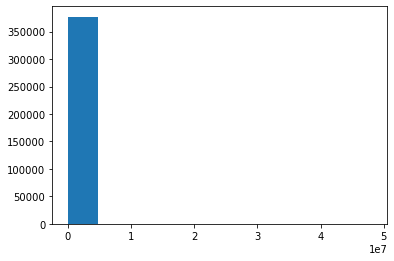

In [4]:
plt.hist(AllClassesDF["WordCount"])

In [ ]:
AllClassesDF.WordCount.value_counts().sort_values().plot(kind = 'line')

In [16]:
# generating one row 
OnePercent = AllClassesDF.sample(frac=0.01, random_state=42, ignore_index=True)

In [17]:
OnePercent.to_json("/home/ravi/PROJECTS_DATA/DataModelsResults/Data/OnePercent.json", orient="records")